In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style to Seaborn
sns.set()
# KMeans module for clustering with scipy and skl
from scipy.cluster.vq import kmeans, vq
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [10]:
#Read CSV and create PANDAS DataFrame
restaurants = pd.read_csv("2020-XTern-DS.csv")

In [11]:
def rank(df):
#create copy of DataFrame and remove Strings from all columns used for trending score
    df_ranked = df
    df_ranked['Rating'] = pd.to_numeric(df_ranked['Rating'], errors='coerce')
    df_ranked['Votes'] = pd.to_numeric(df_ranked['Votes'], errors='coerce')
    df_ranked['Reviews'] = pd.to_numeric(df_ranked['Reviews'], errors='coerce')
    df_ranked = df_ranked.replace(np.nan, 0, regex=True) #Replace NaN with 0
    df_ranked['Trending_Score'] = df_ranked.Rating*(df_ranked.Votes/10000 + df_ranked.Reviews/1000) #Calculate trending score
    return df_ranked.sort_values(by = ['Trending_Score'], ascending=False) #return results ranked by score

In [12]:
rank(restaurants)

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Trending_Score
1180,ID_1064,39.587777,-85.564805,"Continental, North Indian, BBQ, Steak",$80.00,$50.00,4.7,9054.0,6504.0,45 minutes,34.82418
1300,ID_1666,39.959980,-85.903329,"Mexican, American, Italian, Burger",$50.00,$99.00,4.6,4903.0,3989.0,65 minutes,20.60478
123,ID_2885,39.543546,-85.186797,"German, Italian, Cafe",$45.00,$50.00,4.3,4691.0,2547.0,45 minutes,12.96923
1428,ID_2051,39.759886,-85.500507,"Italian, Continental, Chinese, Mexican, Fast F...",$30.00,$50.00,4.7,3975.0,2359.0,65 minutes,12.95555
1796,ID_6511,39.199394,-85.529664,"Street Food, Beverages",$10.00,$50.00,3.9,4438.0,2576.0,45 minutes,11.77722
...,...,...,...,...,...,...,...,...,...,...,...
525,ID_4625,39.396268,-85.708328,"Fast Food, North Eastern, Momos",$10.00,$50.00,0.0,0.0,0.0,30 minutes,0.00000
1757,ID_1721,39.488331,-85.041466,"Chinese, Rolls",$25.00,$50.00,0.0,0.0,0.0,30 minutes,0.00000
1001,ID_318,39.294703,-85.237308,"Italian, Continental, Chinese",$25.00,$50.00,0.0,0.0,0.0,30 minutes,0.00000
998,ID_3280,39.716958,-85.851627,"South Indian, Chettinad",$15.00,$50.00,0.0,0.0,0.0,30 minutes,0.00000


In [13]:
#Create new dict to store count of each cuisine and iterate over each cuisine
d = dict()
for cuisines in restaurants['Cuisines']:
    cuisine_list = cuisines.split(', ')
    for cuisine in cuisine_list:
        if cuisine in d:
            d[cuisine] = d[cuisine] +1
        else:
            d[cuisine] = 1

In [14]:
#Store results and print
res = {key: val for key, val in sorted(d.items(), key = lambda ele: ele[1], reverse = True)}
print(res)

{'North Indian': 878, 'Chinese': 631, 'Fast Food': 561, 'Beverages': 263, 'South Indian': 248, 'Desserts': 204, 'Biryani': 185, 'Mughlai': 170, 'Street Food': 141, 'Italian': 118, 'Bakery': 105, 'Continental': 97, 'Rolls': 96, 'Cafe': 87, 'Pizza': 86, 'Mithai': 63, 'Ice Cream': 60, 'Momos': 59, 'Burger': 54, 'Sandwich': 49, 'Healthy Food': 49, 'Salad': 46, 'Seafood': 40, 'Thai': 35, 'Kebab': 33, 'Asian': 32, 'Maharashtrian': 27, 'Juices': 27, 'Bengali': 22, 'Lebanese': 22, 'American': 20, 'Wraps': 18, 'Mexican': 15, 'Arabian': 15, 'Finger Food': 14, 'European': 13, 'Andhra': 13, 'Tea': 11, 'Tibetan': 11, 'BBQ': 11, 'Kerala': 10, 'Mishti': 10, 'Japanese': 9, 'North Eastern': 8, 'Paan': 8, 'Hyderabadi': 6, 'Sushi': 6, 'Odia': 6, 'Coffee': 6, 'Lucknowi': 5, 'Mediterranean': 5, 'Chettinad': 4, 'Steak': 4, 'Gujarati': 4, 'Bihari': 3, 'Mangalorean': 3, 'Parsi': 3, 'Afghan': 3, 'Goan': 3, 'Rajasthani': 3, 'Modern Indian': 3, 'Awadhi': 3, 'Kashmiri': 3, 'Burmese': 2, 'Tamil': 2, 'Spanish': 2, 

In [15]:
# Grab Latitude and Longitude of restaurants
x = restaurants.iloc[:,1:3]
x

,Latitude,Longitude
0,39.262605,-85.837372
1,39.775933,-85.740581
2,39.253436,-85.123779
3,39.029841,-85.332050
4,39.882284,-85.517407
...,...,...
2014,39.624978,-85.189212
2015,39.133719,-85.503020
2016,39.662987,-85.950894
2017,39.301765,-85.662768


In [17]:
#Determine correct number of clusters from 1-25
K = range(1,25)
KM = [kmeans(x, k) for k in K] #kmeans 1-25
centroids = [cent for (cent,var) in KM] #cluster centroids
D_k = [cdist(x, cent, 'euclidean') for cent in centroids]

cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/x.shape[0] for d in dist]
kIdx = 2

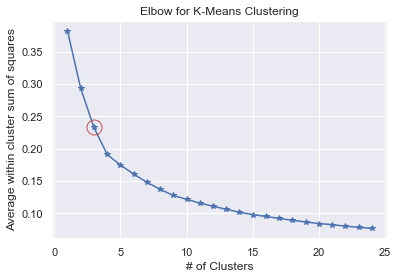

In [18]:
#Plot the resulting elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=15,
        markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('# of Clusters')
plt.ylabel('Average within cluster sum of squares')
tt = plt.title('Elbow for K-Means Clustering')

In [19]:
#Cluster data
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [20]:
#Predict the cluster
identified_clusters = kmeans.fit_predict(x)

In [21]:
#Create new DataFrame with Cluster data
restaurants_with_clusters = restaurants.copy()
restaurants_with_clusters['Cluster'] = identified_clusters
restaurants_with_clusters

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Cluster
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12.0,4.0,30 minutes,0
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11.0,4.0,30 minutes,2
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99.0,30.0,65 minutes,1
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176.0,95.0,30 minutes,0
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521.0,235.0,65 minutes,2
...,...,...,...,...,...,...,...,...,...,...,...
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",$40.00,$0.00,NaN,NaN,NaN,30 minutes,1
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",$40.00,$99.00,4.1,118.0,91.0,30 minutes,0
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",$10.00,$50.00,NaN,NaN,NaN,30 minutes,2
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",$10.00,$50.00,NaN,NaN,NaN,30 minutes,0


(38.8, 40.2)

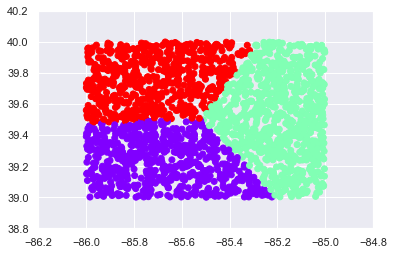

In [22]:
#Create graph
plt.scatter(restaurants['Longitude'], restaurants['Latitude'],
            c=restaurants_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-86.2,-84.8)
plt.ylim(38.8,40.2)

In [ ]:
#Findings